## Climate Data Time-Series

Location: Weather Station, Max Planck Institute for Biogeochemistry in Jena, Germany
Time-frame: Jan 10, 2009 - December 31, 2017

Index  |   Features         |   Format                |   Description
-------|--------------------|-------------------------|-----------------------
1      |   Date Time        |   01.01.2009 00:10:00   |   Date-time reference
2      |   p (mbar)         |   996.52                |   The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars.
3      |   T (degC)         |   -8.02                 |   Temperature in Celsius
4      |   Tpot (K)         |   265.4                 |   Temperature in Kelvin
5      |   Tdew (degC)      |   -8.9                  |   Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses. 
6      |   rh (%)           |   93.3                  |   Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects. 
7      |   VPmax (mbar)     |   3.33                  |   Saturation vapor pressure
8      |   VPact (mbar)     |   3.11                  |   Vapor pressure
9      |   VPdef (mbar)     |   0.22                  |   Vapor pressure deficit
10     |   sh (g/kg)        |   1.94                  |   Specific humidity
11     |   H2OC (mmol/mol)  |   3.12                  |   Water vapor concentration
12     |   rho (g/m ** 3)   |   1307.75               |   Airtight
13     |   wv (m/s)         |   1.03                  |   Wind speed 
14     |   max. wv (m/s)    |   1.75                  |   Maximum wind speed
15     |   wd (deg)         |   152.3                 |   Wind direction in degrees  


In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

SEED_VALUE = 10

tf.random.set_seed(SEED_VALUE)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [2]:
csv_path = './jena_climate_2009_2016.csv'
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


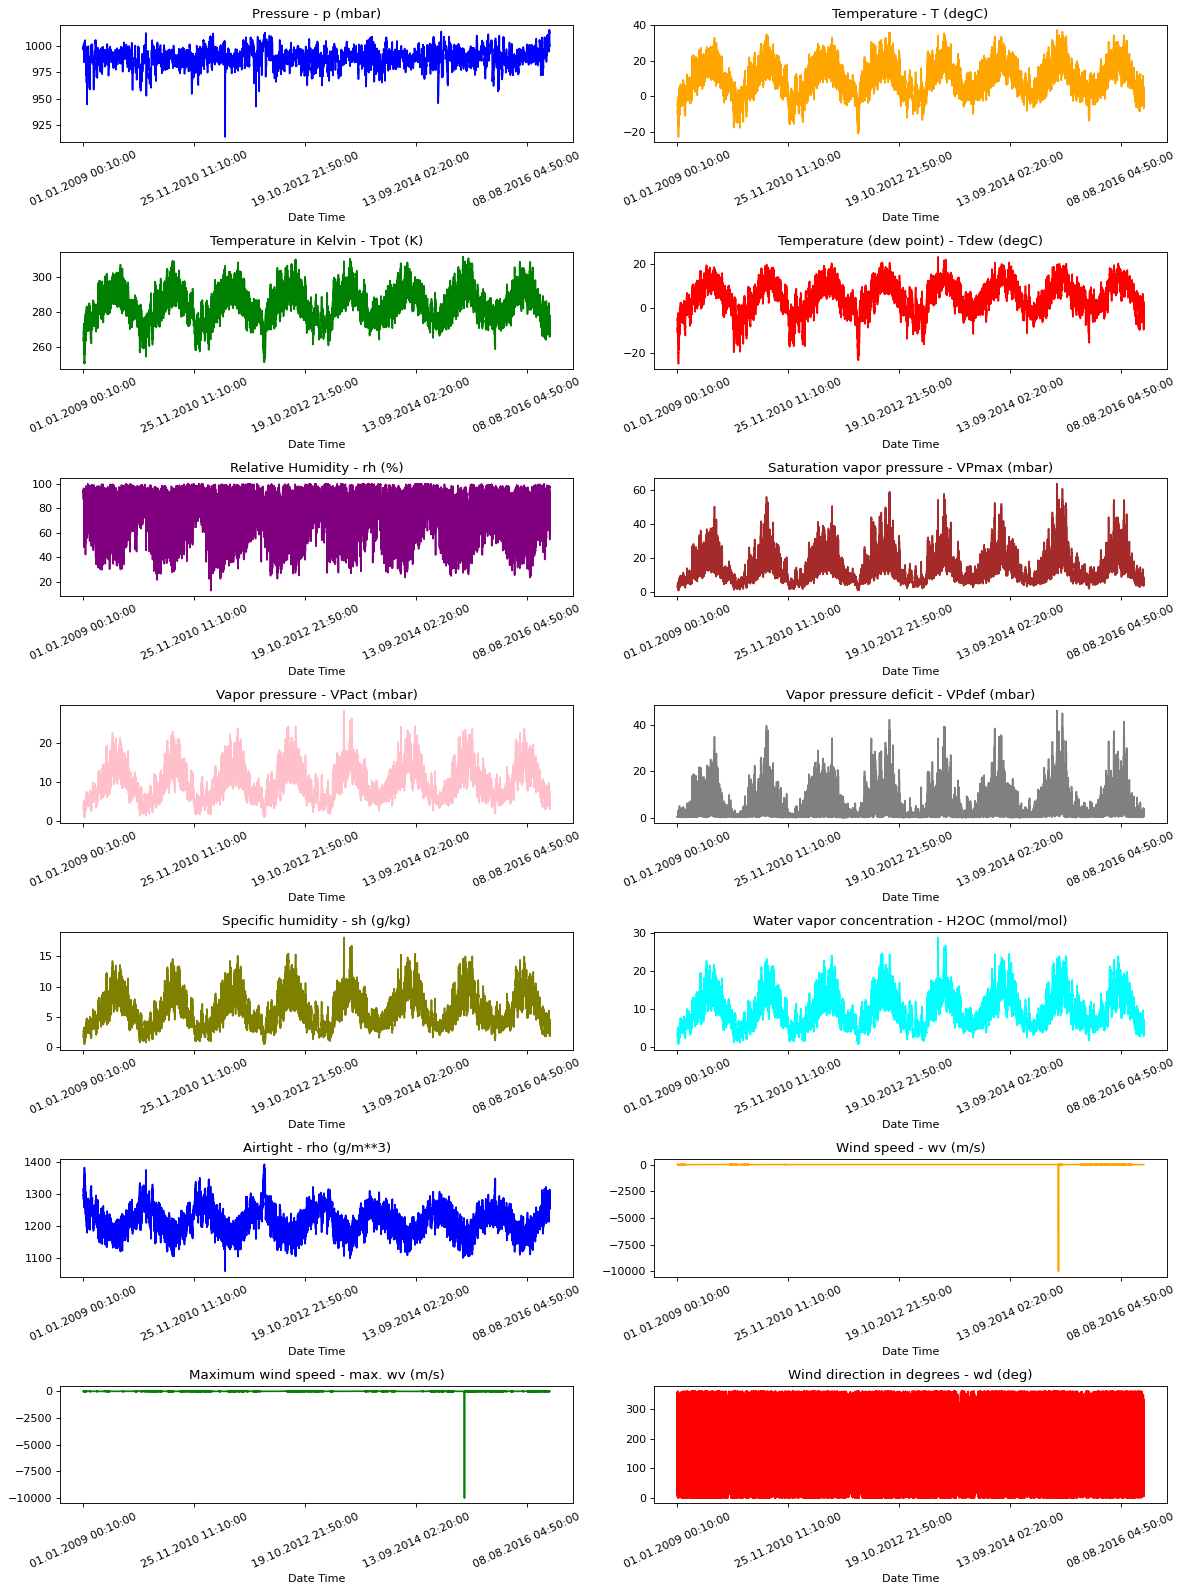

In [6]:
titles = ['Pressure', "Temperature", "Temperature in Kelvin", "Temperature (dew point)", "Relative Humidity", "Saturation vapor pressure", "Vapor pressure", "Vapor pressure deficit", "Specific humidity", "Water vapor concentration", "Airtight", "Wind speed", "Maximum wind speed", "Wind direction in degrees"]
head_keys = ["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)", "VPmax (mbar)", "VPact (mbar)", "VPdef (mbar)", "sh (g/kg)", "H2OC (mmol/mol)", "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)"]
time_data = df['Date Time']

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

fig, axes = plt.subplots(nrows=7, ncols=2,figsize=(15,20), dpi=80, facecolor='w', edgecolor='k')

for i in range(len(head_keys)):
    key = head_keys[i]
    c = colors[i% (len(colors))]
    #print(i // 2, i % 2)
    t_data = df[key]
    t_data.index = time_data
    t_data.head()
    t_data.plot(ax=axes[i // 2, i % 2], color=c, title='{} - {}'.format(titles[i], key), rot=25)

plt.tight_layout()


## Min-Max Feature Scaling Normalization
#### Due to the different units of measure in the dataset, this data will need normalized to get all values between 0 and 1. The below cell normalizes the data using min-max normalization.

In [4]:
import numpy as np 
import pandas as pd 

csv_path = './jena_climate_2009_2016.csv'

#this will avoid using the time column
df = pd.read_csv(csv_path, sep=",", usecols=["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)", "VPmax (mbar)", "VPact (mbar)", 
                                             "VPdef (mbar)", "sh (g/kg)", "H2OC (mmol/mol)", "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)"])

normalized_df = (df-df.min()) / (df.max()-df.min())
print(normalized_df.head())
print(normalized_df.describe())

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)    rh (%)  VPmax (mbar)  \
0  0.814939  0.248632  0.243662     0.334788  0.923033      0.037886   
1  0.815430  0.242163  0.237241     0.326891  0.924182      0.036294   
2  0.815037  0.240504  0.235594     0.326268  0.929925      0.035976   
3  0.814840  0.243822  0.239052     0.331255  0.933372      0.036772   
4  0.814840  0.244485  0.239546     0.331879  0.932223      0.036931   

   VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0      0.084272      0.004782   0.081679         0.082798      0.743213   
1      0.081003      0.004564   0.078843         0.079586      0.749349   
2      0.080639      0.004347   0.078276         0.079229      0.750666   
3      0.082819      0.004130   0.080545         0.081370      0.747523   
4      0.083182      0.004130   0.080545         0.081727      0.746954   

   wv (m/s)  max. wv (m/s)  wd (deg)  
0  0.997262       0.997830  0.423056  
1  0.997231       0.997805  0.378056  
2 